## Sales Prediction 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
advertising =pd.read_csv("/kaggle/input/advertisingcsv/Advertising.csv")

In [3]:
print(advertising.head())
print("Shape of the dataframe:", advertising.shape)

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
Shape of the dataframe: (200, 5)


In [4]:
#dropping redundant columns:
advertising.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### EDA(Exploratory Data Analysis):

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:

advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### 1. Pairwise plot:

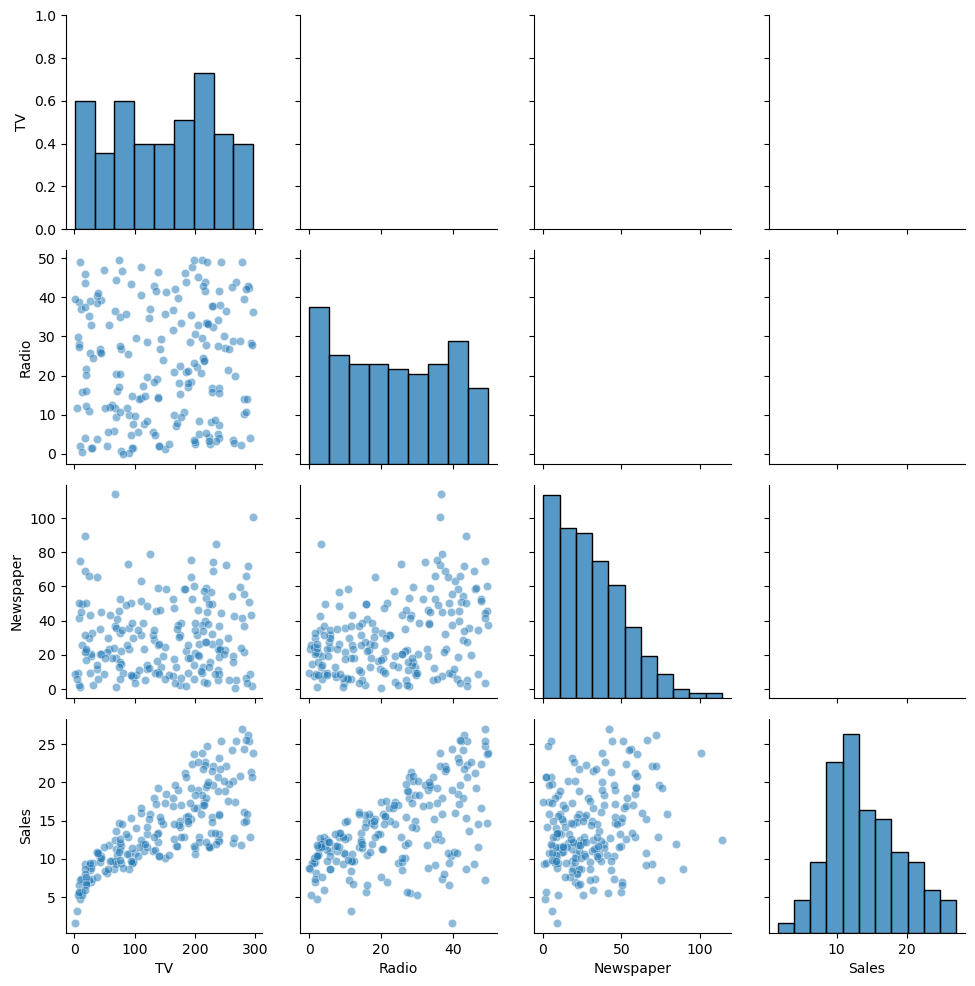

In [8]:
#plotting only in the lower triangular region to avoid cluttering: 
grid = sns.PairGrid(advertising)
grid.map_lower(sns.scatterplot, alpha=0.5)
grid.map_diag(sns.histplot, kde_kws={"color": "k"})
plt.show()

We see that investment in TV has more positive correlation with sales compared to newspaper and radio.

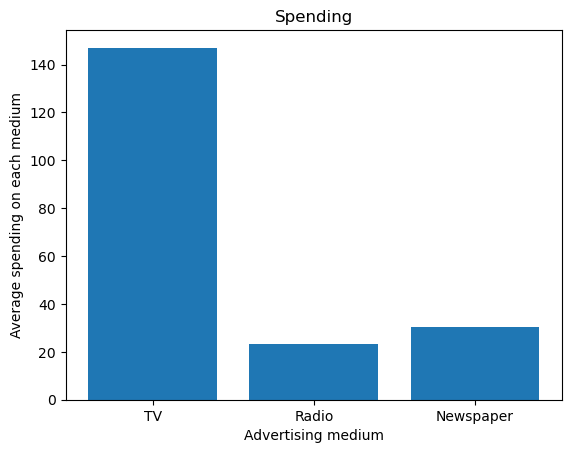

In [9]:
spend_tv=advertising['TV'].mean()
spend_radio=advertising['Radio'].mean()
spend_newspaper=advertising['Newspaper'].mean()
spending = [spend_tv, spend_radio, spend_newspaper]
plt.bar(x=['TV', 'Radio', 'Newspaper'], height=spending)
plt.xlabel('Advertising medium')
plt.ylabel('Average spending on each medium')
plt.title('Spending')
plt.show()

Average spending on advertising through TV is more than radio and newspaper.

In [10]:
import plotly.express as px
plt.figure(figsize=(200,200))
fig = px.scatter_3d(data_frame=advertising,x='TV',y='Radio',z='Newspaper',color='Sales',  title='3D Scatter Plot: TV, Radio, Newspaper vs Sales')

# Show the interactive plot
fig.show()


<Figure size 20000x20000 with 0 Axes>

### Splitting into train and test dataset:

In [11]:
from sklearn.model_selection import train_test_split
advertising_train, advertising_test = train_test_split(advertising, train_size=0.7, random_state=100)
print(advertising_train.shape)
print(advertising_test.shape)

(140, 4)
(60, 4)


### Rescaling the features:

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = ['TV', 'Radio', 'Newspaper']
advertising_train[features]= scaler.fit_transform(advertising_train[features])

<Axes: >

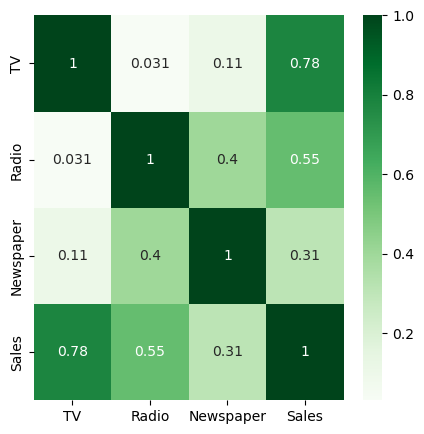

In [13]:
#correlation between variables with heatmap:
plt.figure(figsize=(5,5))
sns.heatmap(advertising_train.corr(), annot=True, cmap='Greens')

we see that newspaper and radio are correlated.

### Building multiple regression model:

In [14]:
import statsmodels.api as sm

In [15]:
#creating X_train and y_train
y_train = advertising_train.pop('Sales')
X_train = advertising_train

In [16]:
print(X_train.shape)
print(y_train.shape)

(140, 3)
(140,)


In [17]:
#adding constant(intercept):
X_train_sm = sm.add_constant(X_train)

#creating multi linear reg model:
linear_model = sm.OLS(y_train, X_train_sm)

#fitting model:
linear_model = linear_model.fit()

#model summary:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           9.97e-66
Time:                        09:06:42   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6860      0.383      7.016      0.000       1.929       3.443
TV            13.4323      0.496     27.093      0.000      12.452      14.413
Radio          9.4120      0.553     17.009      0.000       8.318      10.506
Newspaper      0.5234      0.853      0.613      0.541      -1.164       2.211
==============================================================================
Omnibus:                       40.095   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.622
Skew:                          -1.233   Prob(JB):                     6.94e-19
Kurtosis:                       5.873   Cond. No.                         7.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking multicollinearity:

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
vif = pd.DataFrame()
vif['features']=X_train.columns
vif['vif values'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['vif values'] = round(vif['vif values'],2)
vif = vif.sort_values(by=['vif values'], ascending=False)

In [20]:
vif.head()

,features,vif values
2,Newspaper,3.23
1,Radio,3.20
0,TV,2.33


VIF values are not significantly high, so we ae good to go with our model

### Residual analysis:

In [21]:
#calculating predicted values:
y_train_pred = linear_model.predict(X_train_sm)

#residuals:
residuals = y_train - y_train_pred

<Axes: ylabel='Count'>

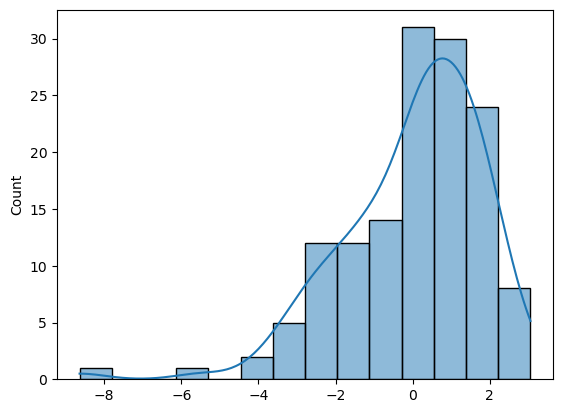

In [22]:
#plotting residuals:
sns.histplot(residuals, kde=True)

In [23]:
from scipy.stats import boxcox

In [24]:
advertising_train

,TV,Radio,Newspaper
74,0.719310,0.495968,0.112577
3,0.509976,0.832661,0.511873
185,0.690903,0.909274,0.169745
26,0.480893,0.590726,0.108179
90,0.451809,0.098790,0.079156
...,...,...,...
87,0.371999,0.818548,0.553210
103,0.633074,0.346774,0.154793
67,0.468718,0.292339,0.087071
24,0.208319,0.254032,0.158311


In [25]:
from sklearn.model_selection import train_test_split
advertising_train, advertising_test = train_test_split(advertising, train_size=0.7, random_state=100)
print(advertising_train.shape)
print(advertising_test.shape)

(140, 4)
(60, 4)


In [26]:
y_train = advertising_train['Sales']
X_train = advertising_train.drop(columns=['Sales'])

In [27]:
epsilon=0.01
X_train['TV'] = X_train['TV'] + epsilon
X_train['Radio'] = X_train['Radio'] + epsilon
X_train['Newspaper'] = X_train['Newspaper']+epsilon

y_train = y_train+epsilon

In [28]:
trans_X_train_tv, lambda_tv = boxcox(x=X_train['TV'])
trans_X_train_radio, lambda_radio = boxcox(x=X_train['Radio'])
trans_X_train_newspaper, lambda_newspaper = boxcox(x=X_train['Newspaper'])
trans_y_train_sales, lambda_sales = boxcox(x=y_train)

In [29]:
trans_y_train_sales

array([6.82480918, 7.23616051, 8.28980903, 6.25001188, 5.05294619,
       4.19998862, 5.41607305, 5.607988  , 3.320116  , 5.76487204,
       5.70243956, 4.08636529, 4.95116215, 6.07094587, 6.74060752,
       5.70243956, 5.76487204, 4.124437  , 7.1007685 , 5.2857844 ,
       4.34881373, 5.48050285, 8.5815332 , 6.39678779, 6.22039421,
       7.65872609, 4.42213508, 6.99123317, 6.90834551, 9.14580677,
       4.88260547, 8.01621418, 6.5126823 , 6.16088954, 5.25290611,
       7.68462485, 5.31853876, 5.48050285, 6.19068705, 4.84811127,
       6.39678779, 5.57628525, 9.32868311, 5.12012267, 6.45490095,
       4.95116215, 6.25001188, 6.13100078, 5.1867716 , 8.55747932,
       5.25290611, 2.87673334, 3.61269068, 6.19068705, 4.91695512,
       6.936046  , 3.44713215, 6.57013788, 6.13100078, 6.79681672,
       8.06641868, 7.81326317, 3.36273745, 4.60243187, 7.52835397,
       4.67340091, 5.44834633, 3.5716912 , 8.96040207, 5.607988  ,
       4.67340091, 3.7341996 , 4.91695512, 7.18220354, 5.54447

In [30]:
X_train = pd.DataFrame()
X_train['TV'] = trans_X_train_tv
X_train['Radio'] = trans_X_train_radio
X_train['Newspaper']= trans_X_train_newspaper
y_train = trans_y_train_sales

In [31]:
y_train

array([6.82480918, 7.23616051, 8.28980903, 6.25001188, 5.05294619,
       4.19998862, 5.41607305, 5.607988  , 3.320116  , 5.76487204,
       5.70243956, 4.08636529, 4.95116215, 6.07094587, 6.74060752,
       5.70243956, 5.76487204, 4.124437  , 7.1007685 , 5.2857844 ,
       4.34881373, 5.48050285, 8.5815332 , 6.39678779, 6.22039421,
       7.65872609, 4.42213508, 6.99123317, 6.90834551, 9.14580677,
       4.88260547, 8.01621418, 6.5126823 , 6.16088954, 5.25290611,
       7.68462485, 5.31853876, 5.48050285, 6.19068705, 4.84811127,
       6.39678779, 5.57628525, 9.32868311, 5.12012267, 6.45490095,
       4.95116215, 6.25001188, 6.13100078, 5.1867716 , 8.55747932,
       5.25290611, 2.87673334, 3.61269068, 6.19068705, 4.91695512,
       6.936046  , 3.44713215, 6.57013788, 6.13100078, 6.79681672,
       8.06641868, 7.81326317, 3.36273745, 4.60243187, 7.52835397,
       4.67340091, 5.44834633, 3.5716912 , 8.96040207, 5.607988  ,
       4.67340091, 3.7341996 , 4.91695512, 7.18220354, 5.54447

In [32]:
#adding constant(intercept):
X_train_sm = sm.add_constant(X_train)

#creating multi linear reg model:
linear_model = sm.OLS(y_train, X_train_sm)

#fitting model:
linear_model = linear_model.fit()

#model summary:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     439.8
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           8.88e-70
Time:                        09:06:43   Log-Likelihood:                -107.46
No. Observations:                 140   AIC:                             222.9
Df Residuals:                     136   BIC:                             234.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3562      0.145      9.335      0.000       1.069       1.643
TV             0.0782      0.003     30.420      0.000       0.073       0.083
Radio          0.1785      0.010     17.059      0.000       0.158       0.199
Newspaper      0.0250      0.016      1.593      0.113      -0.006       0.056
==============================================================================
Omnibus:                       70.508   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              466.591
Skew:                          -1.623   Prob(JB):                    4.80e-102
Kurtosis:                      11.334   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#calculating predicted values:
y_train_pred = linear_model.predict(X_train_sm)

#residuals:
residuals = y_train - y_train_pred

<Axes: ylabel='Count'>

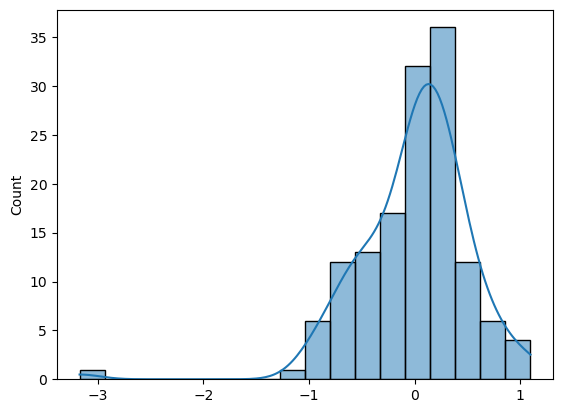

In [34]:
#plotting residuals:
sns.histplot(residuals, kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7aa055b04b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7aa055b041c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7aa055b04e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7aa055b046a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7aa055feef20>],
 'means': []}

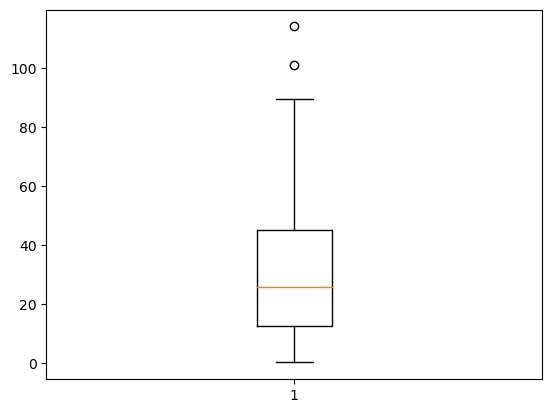

In [35]:
plt.boxplot(advertising['Newspaper'])

In [36]:
advertising[~(advertising['Newspaper']>100)]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


{'whiskers': [<matplotlib.lines.Line2D at 0x7aa0567ed4e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7aa0567ab640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7aa0567ecfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7aa0567a9270>],
 'fliers': [<matplotlib.lines.Line2D at 0x7aa0567aba90>],
 'means': []}

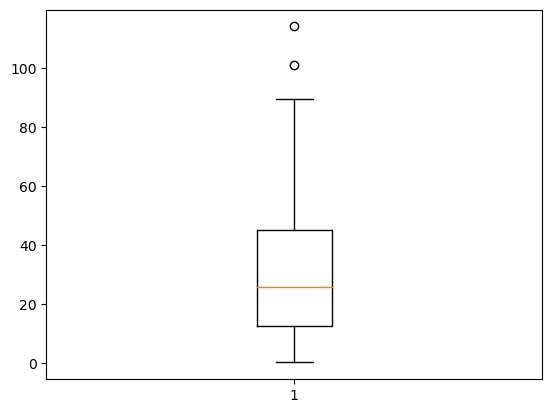

In [37]:
plt.boxplot(x=advertising['Newspaper'])

In [38]:
advertising=advertising[advertising['Newspaper']<100]

{'whiskers': [<matplotlib.lines.Line2D at 0x7aa056f0d6f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7aa056f0f550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7aa056f0f400>],
 'medians': [<matplotlib.lines.Line2D at 0x7aa056f0dcc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7aa055b551e0>],
 'means': []}

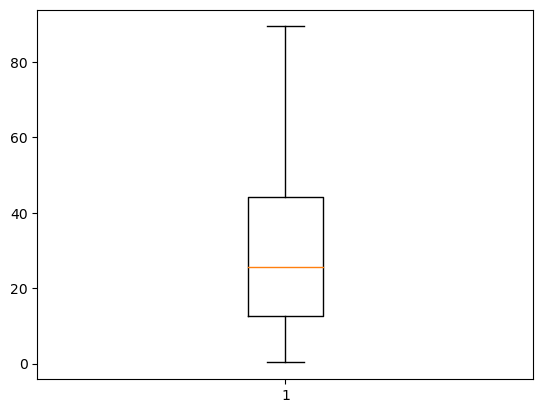

In [39]:
plt.boxplot(advertising['Newspaper'])

In [40]:
from sklearn.model_selection import train_test_split
advertising_train, advertising_test = train_test_split(advertising, train_size=0.7, random_state=100)
print(advertising_train.shape)
print(advertising_test.shape)

(138, 4)
(60, 4)


In [41]:
y_train = advertising_train['Sales']
X_train = advertising_train.drop(columns=['Sales'])

In [42]:
epsilon=0.01
X_train['TV'] = X_train['TV'] + epsilon
X_train['Radio'] = X_train['Radio'] + epsilon
X_train['Newspaper'] = X_train['Newspaper']+epsilon

y_train = y_train+epsilon

In [43]:
trans_X_train_tv, lambda_tv = boxcox(x=X_train['TV'])
trans_X_train_radio, lambda_radio = boxcox(x=X_train['Radio'])
trans_X_train_newspaper, lambda_newspaper = boxcox(x=X_train['Newspaper'])
trans_y_train_sales, lambda_sales = boxcox(x=y_train)

In [44]:
X_train = pd.DataFrame()
X_train['TV'] = trans_X_train_tv
X_train['Radio'] = trans_X_train_radio
X_train['Newspaper']= trans_X_train_newspaper
y_train = trans_y_train_sales

In [45]:
#adding constant(intercept):
X_train_sm = sm.add_constant(X_train)

#creating multi linear reg model:
linear_model = sm.OLS(y_train, X_train_sm)

#fitting model:
linear_model = linear_model.fit()

#model summary:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     530.8
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           3.78e-74
Time:                        09:06:44   Log-Likelihood:                 1.6684
No. Observations:                 138   AIC:                             4.663
Df Residuals:                     134   BIC:                             16.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8685      0.071     26.302      0.000       1.728       2.009
TV             0.0207      0.001     32.362      0.000       0.019       0.022
Radio          0.1131      0.005     21.387      0.000       0.103       0.124
Newspaper     -0.0023      0.006     -0.359      0.720      -0.015       0.010
==============================================================================
Omnibus:                       21.272   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.551
Skew:                          -0.915   Prob(JB):                     1.72e-06
Kurtosis:                       4.125   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#calculating predicted values:
y_train_pred = linear_model.predict(X_train_sm)

#residuals:
residuals = y_train - y_train_pred

<Axes: ylabel='Count'>

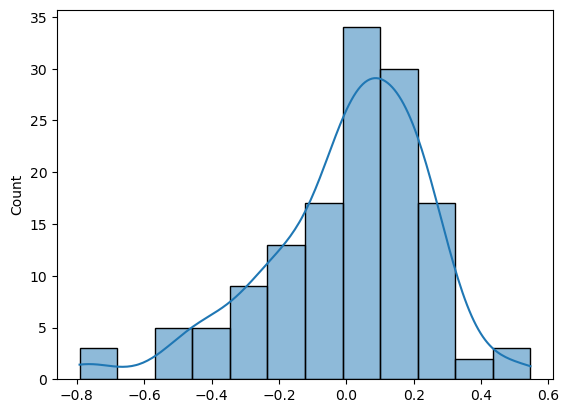

In [47]:
#plotting residuals:
sns.histplot(residuals, kde=True)

In [48]:
from sklearn.model_selection import train_test_split
advertising_train, advertising_test = train_test_split(advertising, train_size=0.7, random_state=100)
print(advertising_train.shape)
print(advertising_test.shape)

(138, 4)
(60, 4)


In [49]:
y_train = advertising_train['Sales']
X_train = advertising_train.drop(columns=['Sales'])

In [50]:
epsilon=0.01
X_train['TV'] = X_train['TV'] + epsilon
X_train['Radio'] = X_train['Radio'] + epsilon
X_train['Newspaper'] = X_train['Newspaper']+epsilon

y_train = y_train+epsilon

In [51]:
trans_X_train_tv = boxcox(x=X_train['TV'], lmbda=0.5)
trans_X_train_radio = boxcox(x=X_train['Radio'], lmbda=0.5)
trans_X_train_newspaper = boxcox(x=X_train['Newspaper'], lmbda=0.5)
trans_y_train_sales= boxcox(x=y_train, lmbda=0.5)

In [52]:
X_train = pd.DataFrame()
X_train['TV'] = trans_X_train_tv
X_train['Radio'] = trans_X_train_radio
X_train['Newspaper']= trans_X_train_newspaper
y_train = trans_y_train_sales

In [53]:
#adding constant(intercept):
X_train_sm = sm.add_constant(X_train)

#creating multi linear reg model:
linear_model = sm.OLS(y_train, X_train_sm)

#fitting model:
linear_model = linear_model.fit()

#model summary:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     712.9
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           3.82e-82
Time:                        09:06:44   Log-Likelihood:                -41.865
No. Observations:                 138   AIC:                             91.73
Df Residuals:                     134   BIC:                             103.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1101      0.109     10.161      0.000       0.894       1.326
TV             0.1311      0.004     37.428      0.000       0.124       0.138
Radio          0.2170      0.009     25.020      0.000       0.200       0.234
Newspaper      0.0007      0.008      0.092      0.927      -0.015       0.016
==============================================================================
Omnibus:                        3.401   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                2.940
Skew:                           0.261   Prob(JB):                        0.230
Kurtosis:                       3.490   Cond. No.                         97.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#calculating predicted values:
y_train_pred = linear_model.predict(X_train_sm)

#residuals:
residuals = y_train - y_train_pred

<Axes: ylabel='Count'>

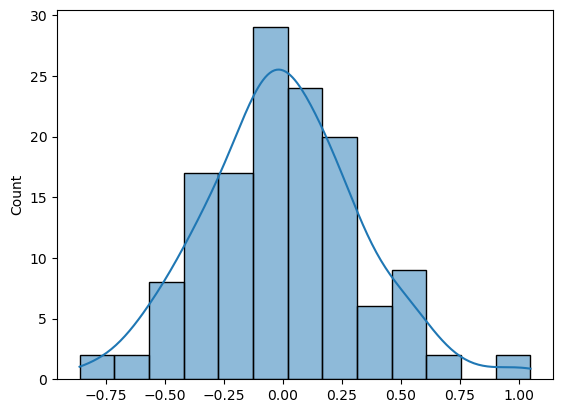

In [55]:
#plotting residuals:
sns.histplot(residuals, kde=True)

Skewness is now better. And residual terms converge to almost a normal distribution. i.e, $$Res \sim \mathcal{N}(0,\,1)$$

### Model Evaluation:

In [56]:
#creating X_tets and y_test:
y_test = advertising_test.pop('Sales')
X_test = advertising_test
print(X_test.shape)
print(y_test.shape)

(60, 3)
(60,)


In [57]:
#adding a small constant to make data positive:
epsilon=0.01
X_test['TV'] = X_test['TV'] + epsilon
X_test['Radio'] = X_test['Radio'] + epsilon
X_test['Newspaper'] = X_test['Newspaper']+epsilon

y_test = y_test+epsilon

In [58]:
#perfoming box-cox(square root transform)on test data:
trans_X_test_tv = boxcox(x=X_test['TV'], lmbda=0.5)
trans_X_test_radio = boxcox(x=X_test['Radio'], lmbda=0.5)
trans_X_test_newspaper = boxcox(x=X_test['Newspaper'], lmbda=0.5)
trans_y_test_sales= boxcox(x=y_test, lmbda=0.5)

In [59]:
#creating X_test dataframe containing box-cox transformed values:
X_test = pd.DataFrame()
X_test['TV'] = trans_X_test_tv
X_test['Radio'] = trans_X_test_radio
X_test['Newspaper']= trans_X_test_newspaper
y_test = trans_y_test_sales

In [60]:
#adding constant term:
X_test_sm = sm.add_constant(X_test)


In [61]:
#prediction on X_test_sm:
y_test_pred = linear_model.predict(X_test_sm)

In [62]:
#determining coefficient of determination(R-square vale):
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_test_pred)

0.8808381176919088

Text(0.5, 1.0, 'True vs Predicted sales values')

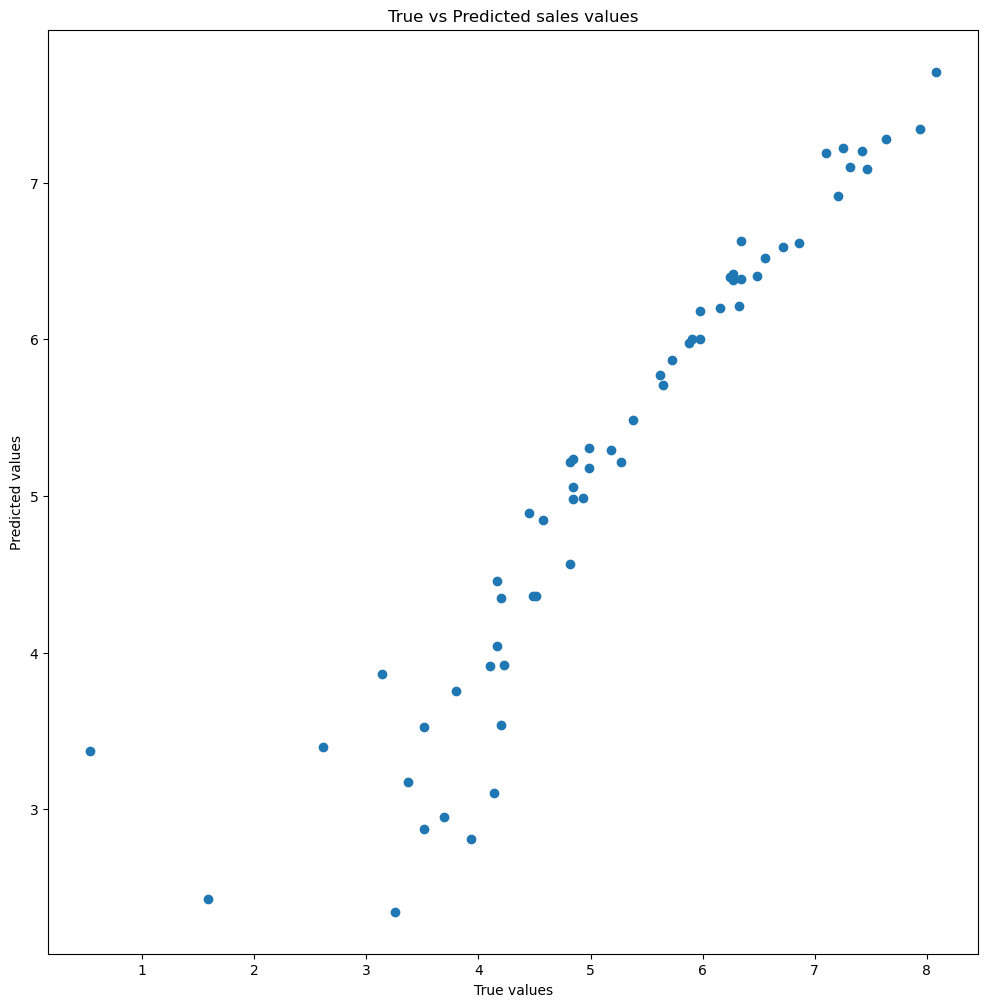

In [63]:
plt.figure(figsize=(12,12))
plt.scatter(y_test, y_test_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs Predicted sales values')


### Using Decision Tree Regressor:

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
rf = RandomForestRegressor(n_estimators=100, random_state=100, max_depth=4, n_jobs=-1, min_samples_leaf=5)

In [66]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=5, n_jobs=-1,
                      random_state=100)

In [67]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [68]:
r2_score(y_test, y_test_pred)

0.8995193102414661

In [69]:
r2_score(y_train, y_train_pred)

0.9793323485683235